In [1]:
#The name of this project is 'Cryptara' and the objective of this script is to build a Robo-advisor
name = input("Welcome Crypto Investor, what is your name?")

Welcome Crypto Investor, what is your name? Jake


In [2]:
#Introduction. Have user input their desired upload option. Options include importing a csv or inputting individual tickers.
if name != "" or name == None:
    # Store user's cash investment.
    print(f"Hello {name}, my name is Cryptara. I make your savings go to good use in the Crypto market..")
    print(f"Tell me, do you have a csv file to upload or would you rather manually input your crypto tickers below?")
    print('')
    data_source=input("type: 'import' OR 'input'")
    print(f"{data_source} option has been selected..")
    print(f"")
    investment=input("how much cash would you like to invest?")
    print('')
    print(f'Once I have your list, This process starts automatically..')
    print(f'I use data from the TradingView API and filter your list, then I apply a built-in technical analysis function to determine which cryptos are good picks at this point in time')
    print(f"Then, I run hundreds of simulations to determine optimal weights for each crypto selection")
    print(f"From there, I will scan multiple exchanges to determine where you could get the most volume for the dollar at that particular time '(based on cross-exchange rates)'")
    print(f"Lastly, I will present to you an interactive Dashboard based on future projections..")

Hello Jake, my name is Cryptara. I make your savings go to good use in the Crypto market..
Tell me, do you have a csv file to upload or would you rather manually input your crypto tickers below?



type: 'import' OR 'input' import


import option has been selected..



how much cash would you like to invest? 215143.51



Once I have your list, This process starts automatically..
I use data from the TradingView API and filter your list, then I apply a built-in technical analysis function to determine which cryptos are good picks at this point in time
Then, I run hundreds of simulations to determine optimal weights for each crypto selection
From there, I will scan multiple exchanges to determine where you could get the most volume for the dollar at that particular time '(based on cross-exchange rates)'
Lastly, I will present to you an interactive Dashboard based on future projections..


In [3]:
#User input validation
if data_source == 'import':
    from pathlib import Path
    ticker_data = Path("data_files/crypto_tickers1.csv")
    print(f'Thanks for using our csv file import option! Let me look through your list and see if I can validate the data..')
if data_source == 'input':
    ticker_1=input("Tell me the first ticker")
    ticker_2=input("Tell me the second ticker")
    ticker_3=input("Tell me the third ticker")
    ticker_4=input("Tell me the fourth ticker")
    ticker_5=input("Tell me the fifth ticker")
    ticker_6=input("Tell me the sixth ticker")
    ticker_7=input("Tell me the seventh ticker")
    ticker_8=input("Tell me the eigth ticker")
    ticker_9=input("Tell me the ninth ticker")
    ticker_10=input("Tell me the tenth ticker")
    print(f'Got it. Give me a minute to make sure these tickers are valid')
if data_source != 'import':
    if data_source != 'input':
        data_source = input('Please try again..')

Thanks for using our csv file import option! Let me look through your list and see if I can validate the data..


In [4]:
#Import libraries and dependencies
from dotenv import load_dotenv
from itertools import product
import datetime
import os
import logging
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [5]:
#Create TradingView variable and activate env variables
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")

In [6]:
#Log into TradingView
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(tradev_id, tradev_secret_key, chromedriver_path=None)
print('Connected to TradingView..')

DEBUG:tvDatafeed.main:auth loaded


Connected to TradingView..


In [7]:
from pathlib import Path
ticker_data = Path("data_files/crypto_tickers1.csv")
ticker= pd.read_csv(ticker_data, header=None)
ticker_df = pd.DataFrame(ticker)
my_crypto_list = ticker_df[0].tolist()
screener="CRYPTO"
exchange="BINANCE"
df_daily = pd.DataFrame()
print(f"Nice work! No issues have been identified, let me look into these and get back to you shortly...")

Nice work! No issues have been identified, let me look into these and get back to you shortly...


In [8]:
#Get historical pricing information for total population
print(f'Extracting price history..')
for ticker in my_crypto_list:
    data = tv.get_hist(
        symbol=ticker,
        exchange=exchange,
        interval=Interval.in_daily,n_bars=500)
    df_daily = df_daily.append(data)
print(f'finished extracting historical prices..')

DEBUG:root:creating websocket connection


Extracting price history..


DEBUG:tvDatafeed.main:getting data for BINANCE:BTCUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:ETHUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:DOGEUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:LTCUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:VGXETH...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:VGXBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:MBOXBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEBNB...
DEBUG:root:creating websocket connection
DEBUG:tvData

finished extracting historical prices..


In [9]:
#Grab indicator recommendations from Trading View API
print(f'Risk protocol: Filtering by analyst recommendations')
from tradingview_ta import TA_Handler, Interval, Exchange
staging_df = pd.DataFrame()
ticker_df_daily = pd.DataFrame()
for ticker in my_crypto_list:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().summary)
        symbol = ticker
        staging_df = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        ticker_df_daily = ticker_df_daily.append(final_df)
    except:
        pass
print(f'finished extracting analyst recommendations..')

Risk protocol: Filtering by analyst recommendations


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionp

finished extracting analyst recommendations..


In [10]:
#Filter imported list by analyst recommendations
print(f'We checked what the top analysts are saying about each crypto in your list')
print(f'To reduce program speed, Cryptara will only analyze cryptos that meet a BUY or NEUTRAL classification')
initial_drop = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='SELL']
initial_pass_prime = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='BUY']
initial_pass_subprime = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='NEUTRAL']
#initial_drop = initial_indicator['RECOMMENDATION'].str.contains('SELL')
buy_count = initial_pass_prime['RECOMMENDATION'].count() + initial_pass_subprime['RECOMMENDATION'].count()
sell_count = initial_drop['RECOMMENDATION'].count()
print('Here are the initial findings:')
print('')
print(f'It is not a good time to invest in {sell_count} of the cryptos from your list')
print(f'These {sell_count} cryptos are not in a buying position')
print(initial_drop['RECOMMENDATION'])
print(f'These {sell_count} cryptos have been dropped from consideration..')
print('')
print('')
print(f'Moving on, our initial inidicator data suggest {buy_count} cryptos from your list should be considered for further analysis:')
print('Here they are:')
print('Our Prime candidates that are in buy positions are:')
print(initial_pass_prime['RECOMMENDATION'])
print('')
print('And these are neutral for now, we can resverve for later if we need additional cryptos for analysis')
print(initial_pass_subprime['RECOMMENDATION'])

We checked what the top analysts are saying about each crypto in your list
To reduce program speed, Cryptara will only analyze cryptos that meet a BUY or NEUTRAL classification
Here are the initial findings:

It is not a good time to invest in 39 of the cryptos from your list
These 39 cryptos are not in a buying position
BTCUSD       SELL
ETHUSD       SELL
DOGEUSD      SELL
VGXBTC       SELL
MBOXBNB      SELL
MITHBNB      SELL
VTHOBNB      SELL
BURGERBNB    SELL
MATICBNB     SELL
GXSBTC       SELL
GLMBTC       SELL
PAXGUSDT     SELL
ADABTC       SELL
WINBNB       SELL
PERLBNB      SELL
BATETH       SELL
DASHETH      SELL
PSGBTC       SELL
USDTBVND     SELL
POLSBNB      SELL
FETBTC       SELL
SYSBUSD      SELL
SYSUSD       SELL
BUSDBVND     SELL
BUSDUAH      SELL
LPTBTC       SELL
CLVBNB       SELL
ADXETH       SELL
USDTUAH      SELL
FUNETH       SELL
WRXBNB       SELL
WINTRX       SELL
USDTDAI      SELL
CLVBTC       SELL
DASHBTC      SELL
FIOBNB       SELL
BUSDDAI      SELL
AVABNB     

In [11]:
#Extract index values for the tickers that are prime and subprime and format data for further analysis. 
print(f'Nice work, {name}, you found {buy_count} cryptos that might be good investments this week!')
initial_pass_prime.reset_index(inplace=True)
initial_pass_prime = initial_pass_prime['index']
initial_pass_subprime.reset_index(inplace=True)
initial_pass_subprime = initial_pass_subprime['index']
staging_df = pd.DataFrame()
staging_df1 = pd.DataFrame()
prime_df = pd.DataFrame()
subprime_df = pd.DataFrame()
print(f'Lets see what Cryptara thinks about these cryptos..')
print(f'')


Nice work, Jake, you found 72 cryptos that might be good investments this week!
Lets see what Cryptara thinks about these cryptos..



In [12]:
#Run a for loop through prime and subprime cryptos and pull in all oscilattor data for technical analysis
#Prime cryptos
print(f'Extracting oscillator data from TradingView for built in technical analysis test...')
for ticker in initial_pass_prime:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().indicators)
        symbol = ticker
        staging_df = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        prime_df = prime_df.append(final_df)
    except:
        pass
    
#Sub-prime cryptos
for ticker in initial_pass_subprime:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().indicators)
        symbol = ticker
        staging_df1 = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        subprime_df = subprime_df.append(final_df)
    except:
        pass
print('Extracted oscillator data, initializing technical analysis test on key trend indicators..')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443


Extracting oscillator data from TradingView for built in technical analysis test...


DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionp

Extracted oscillator data, initializing technical analysis test on key trend indicators..


In [13]:
#Extract oscillator information for all cryptos that meet the 'buy threshold'  
crypataras_picks = []
print(f'Determining which cryptos are in an optimal buying position based on trend indicators...')
print('Relative Strength Index (RSI), Moving Average Covergence and Divergence (MACD), Stachator positioning and the Awesome Oscillators')
print(f'By doing this, we can see which cryptos are currently overbought or oversold based on historical prices..')
print(f'')
def strong_performers():
    for i, j in prime_df.iterrows():
        if j['RSI'] > 45 and j['RSI'] < 90:
            print(f'{i} has passed the rsi_test, moving to moving average covergence and divergence analysis..')
            if j['MACD.macd'] > 0 and j['MACD.macd'] < 40:
                print(f'{i} has passed our moving average covergence and divergence analysis, moving to stochator analysis..')
                if j['Stoch.K'] > 35 and j['Stoch.K'] < 85:
                    if j['Stoch.D'] > 40 and j['Stoch.D'] < 85:
                        if j['Stoch.RSI.K'] > 30 and j['Stoch.RSI.K'] < 80:
                            print(f'{i} has passed our multiple stochator analysis, testing the Awesome Oscillators..')
                            if j['AO'] > 0 and j['AO'] < 55:
                                if i not in crypataras_picks:
                                    print(f'Crytara has selected {i} ')
                                    crypataras_picks.append(i)
                                
    else:
        print(f'FAIL! dropping crypto from further consideration..')

strong_performers()
initial_count = len(crypataras_picks)
print(f'')
print('Technical Analysis test is complete.')
print('')
print('Crptara has analyzed key technical indicators and suggest that the following crypto assets')
print('are in optimal buying positions')
print(f'Crytara chooses: {crypataras_picks}')

Determining which cryptos are in an optimal buying position based on trend indicators...
Relative Strength Index (RSI), Moving Average Covergence and Divergence (MACD), Stachator positioning and the Awesome Oscillators
By doing this, we can see which cryptos are currently overbough or oversold based on historical prices..

TRIBEBNB has passed the rsi_test, moving to moving average covergence and divergence analysis..
BTCDOWNUSDT has passed the rsi_test, moving to moving average covergence and divergence analysis..
1INCHDOWNUSDT has passed the rsi_test, moving to moving average covergence and divergence analysis..
HARDBNB has passed the rsi_test, moving to moving average covergence and divergence analysis..
HARDBNB has passed our moving average covergence and divergence analysis, moving to stochator analysis..
EOSDOWNUSDT has passed the rsi_test, moving to moving average covergence and divergence analysis..
BNBDOWNUSDT has passed the rsi_test, moving to moving average covergence and div

In [14]:
print(f'{initial_count} tickers are in optimal buying positions..lets see if we have the minimum buy count of five..')
print(f'')
#Test if we have a minimum of five tickers for final analyses. 
if len(crypataras_picks) > 5:
    print('Minimum requirements have been met')
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_1 = subprime_df.sample().reset_index()
    ticker_random_1 = computer_selection_1.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_1])
    if string in crypataras_picks:
        pass
    else:
        crypataras_picks.append(string)
        print(f'added {string} from prime dataframe to meet minimum requirements')
        
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_2 = subprime_df.sample().reset_index()
    ticker_random_2 = computer_selection_2.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_2])
    if string in crypataras_picks:
        pass
    else:
        crypataras_picks.append(string)
        print(f'added {string} from prime dataframe to meet minimum requirements')
        
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_3 = subprime_df.sample().reset_index()
    ticker_random_3 = computer_selection_3.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_3])
    if string in crypataras_picks:
        pass
    else:
        crypataras_picks.append(string)
        print(f'added {string} from prime dataframe to meet minimum requirements')
        
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_4 = subprime_df.sample().reset_index()
    ticker_random_4 = computer_selection_4.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_4])
    if string in crypataras_picks:
        pass
    else:
        crypataras_picks.append(string)
        print(f'added {string} from prime dataframe to meet minimum requirements')

print(f'')
print(f'Here are the final Cryptara picks:')
print(f'')
crypataras_picks

5 tickers are in optimal buying positions..lets see if we have the minimum buy count of five..


Here are the final Cryptara picks:



['GLMETH', 'TRXXRP', 'OMGBTC', 'OMGETH', 'LPTBNB']

In [15]:
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")
print(f'Gathering return data on Crypto picks..')
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(tradev_id, tradev_secret_key, chromedriver_path=None)

DEBUG:tvDatafeed.main:auth loaded


Gathering return data on Crypto picks..


In [16]:
print(f'Extracting most recent prices..')
final_crypto_df = pd.DataFrame()
bars= 100
for all_picks in crypataras_picks:
    picks_df = tv.get_hist(symbol=all_picks,
                       exchange=exchange,
                       interval=Interval.in_daily,
                       n_bars=bars)
    final_crypto_df = final_crypto_df.append(picks_df)
final_crypto_df.head(5)

DEBUG:root:creating websocket connection


Extracting most recent prices..


DEBUG:tvDatafeed.main:getting data for BINANCE:GLMETH...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRXXRP...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:OMGBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:OMGETH...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:LPTBNB...


,symbol,open,high,low,close,volume
datetime,,,,,,
2021-06-13 19:00:00,BINANCE:GLMETH,0.000114,0.000118,0.000111,0.000114,2171502.0
2021-06-14 19:00:00,BINANCE:GLMETH,0.000114,0.000117,0.000111,0.000116,1460138.0
2021-06-15 19:00:00,BINANCE:GLMETH,0.000115,0.000122,0.000114,0.000122,1163622.0
2021-06-16 19:00:00,BINANCE:GLMETH,0.000121,0.000127,0.000116,0.000118,1646170.0
2021-06-17 19:00:00,BINANCE:GLMETH,0.000117,0.000118,0.000113,0.000117,1372357.0


In [17]:
#Format dataframe.
#Step 1: extract exchange and ticker from 'symbol' column into separate columns.
final_df_cleaner = final_crypto_df
final_df_cleaner[['exchange', 'ticker']] = final_df_cleaner['symbol'].str.split(':',expand=True)
#Step 2: Extract ticker and close values, reset index
final_df_cleaner = final_df_cleaner[['ticker','close']]
final_df_cleaner = final_df_cleaner[['ticker','close']].reset_index()
#Step3: Pivot data to make ticker values the column headers
final_df_cleaner = final_df_cleaner.pivot(index='datetime',
           columns='ticker',
           values='close')
#Step4: calculate return data
print('Extracted historical returns into dataframe..')
crypto_pick_returns = final_df_cleaner.pct_change().dropna()
crypto_pick_returns.tail(5)

Extracted historical returns into dataframe..


ticker,GLMETH,LPTBNB,OMGBTC,OMGETH,TRXXRP
datetime,,,,,
2021-09-16 19:00:00,0.095436,0.054751,-0.041600,-0.003190,-0.074029
2021-09-17 19:00:00,-0.033460,-0.007722,0.013356,0.024400,-0.001925
2021-09-18 19:00:00,-0.013717,-0.040208,0.124108,0.133932,0.002843
2021-09-19 19:00:00,0.085430,0.053378,0.167074,0.187672,0.005669
2021-09-20 19:00:00,-0.048200,-0.005345,-0.083298,-0.069585,0.010066


In [18]:
#Step5: Calculate Cumulative Returns
print('Calculated cumulative returns..')
cumulative_daily_returns = (1 + crypto_pick_returns).cumprod() -1
cumulative_daily_returns.tail(10)

Calculated cumulative returns..


ticker,GLMETH,LPTBNB,OMGBTC,OMGETH,TRXXRP
datetime,,,,,
2021-09-11 19:00:00,0.419014,-0.393356,0.600778,0.373333,0.248174
2021-09-12 19:00:00,0.342430,-0.415051,0.486381,0.290370,0.219829
2021-09-13 19:00:00,0.319542,-0.399864,0.484047,0.291852,0.335685
2021-09-14 19:00:00,0.272887,-0.400000,0.469261,0.240988,0.333086
2021-09-15 19:00:00,0.272887,-0.400678,0.459144,0.238519,0.319223
2021-09-16 19:00:00,0.394366,-0.367864,0.398444,0.234568,0.221562
2021-09-17 19:00:00,0.347711,-0.372746,0.417121,0.264691,0.219210
2021-09-18 19:00:00,0.329225,-0.397966,0.592996,0.434074,0.222676
2021-09-19 19:00:00,0.442782,-0.365831,0.859144,0.703210,0.229608


In [19]:
#Step5: Calculate Cumulative Returns
print('Activating Cryptara Smartfolio')
print('')
print('Logging returns to normalize dataset..')
log_returns= np.log(cumulative_daily_returns)
log_returns.tail()

Activating Cryptara Smartfolio

Logging returns to normalize dataset..


ticker,GLMETH,LPTBNB,OMGBTC,OMGETH,TRXXRP
datetime,,,,,
2021-09-16 19:00:00,-0.930475,NaN,-0.920189,-1.450010,-1.507052
2021-09-17 19:00:00,-1.056383,NaN,-0.874380,-1.329191,-1.517724
2021-09-18 19:00:00,-1.111013,NaN,-0.522567,-0.834540,-1.502037
2021-09-19 19:00:00,-0.814678,NaN,-0.151819,-0.352100,-1.471383
2021-09-20 19:00:00,-0.985535,NaN,-0.350579,-0.536671,-1.418878


In [20]:
#Calculate volatility and 
print(f'Running multiple scenaries to determine appropriate weights for selected cryptos')
#Initialize variables for 
num_of_portfolios= 5000
weight= np.zeros((num_of_portfolios,len(crypataras_picks)))
expected_return=  np.zeros(num_of_portfolios)
expected_volatility= np.zeros(num_of_portfolios)
sharpe_ratio= np.zeros(num_of_portfolios)
expected_return
mean_log_ret= log_returns.mean()
sigma = log_returns.cov()

for i in range (num_of_portfolios):
    # generate random weight vectos 
    w= np.array(np.random.random(len(crypataras_picks)))
        #sum of weights equal to 1 
    w= w/ np.sum(w)
    weight[i,:]= w
    
    # expected log return 
    expected_return[i]= np.sum(mean_log_ret*w) 
    
    #expected volatility 
    expected_volatility[i]= np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    
    # sharpe ratio
    sharpe_ratio[i] =  expected_return[i]/expected_volatility[i]
    
print(f'Here are the weights: ')
# Weighted portfolio that sharpe ratio
max_index = sharpe_ratio.argmax()
weight[max_index,:]

Running multiple scenaries to determine appropriate weights for selected cryptos
Here are the weights: 


array([0.17165527, 0.22268194, 0.18135462, 0.21289082, 0.21141735])

In [21]:
# Portfolio weights are exported to a csv that can be used for monteclaro simulation
print(f'Loading Smartfolio weights..')
print(f'One Second please....')
investment = float(investment)
portfolio_weights = np.array([weight[max_index,:]])
portfolio_weights = portfolio_weights.tolist() 
smartfolio_weights = pd.DataFrame(portfolio_weights)
total_invested=(smartfolio_weights*investment).round(2)
smartfolio_weights.to_csv('smartfolio_weights.csv')
print(f' ............and DONE!')
print(f'Now give me a second while I allocate your funds...') 
print('')
print(f'{crypataras_picks[0]} the optimal portfolio weight is {smartfolio_weights[0]}, and your total invesment ${total_invested.iloc[0][0]}.')
print('')
print(f'{crypataras_picks[1]} optimal portfolio weight is {smartfolio_weights.iloc[0][1]:.3f}, wiht a total of invesment ${total_invested.iloc[0][1]}.')
print('')
print(f'{crypataras_picks[2]} the optimal portfolio weight is {smartfolio_weights.iloc[0][2]:.3f}, and your total invesment ${total_invested.iloc[0][2]}.')
print('')
print(f'{crypataras_picks[3]} optimal portfolio weight is {smartfolio_weights.iloc[0][3]:.3f}, wiht a total of invesment ${total_invested.iloc[0][3]}.')
print('')
print(f'{crypataras_picks[4]} optimal portfolio weight is {smartfolio_weights.iloc[0][4]:.3f}, wiht a total of invesment ${total_invested.iloc[0][4]}.')

Loading Smartfolio weights..
One Second please....
 ............and DONE!
Now give me a second while I allocate your funds...

GLMETH the optimal portfolio weight is 0    0.171655
Name: 0, dtype: float64, and your total invesment $36930.52.

TRXXRP optimal portfolio weight is 0.223, wiht a total of invesment $47908.57.

OMGBTC the optimal portfolio weight is 0.181, and your total invesment $39017.27.

OMGETH optimal portfolio weight is 0.213, wiht a total of invesment $45802.08.

LPTBNB optimal portfolio weight is 0.211, wiht a total of invesment $45485.07.


DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000187FD9C3E80>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000187FD9C3E80> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni

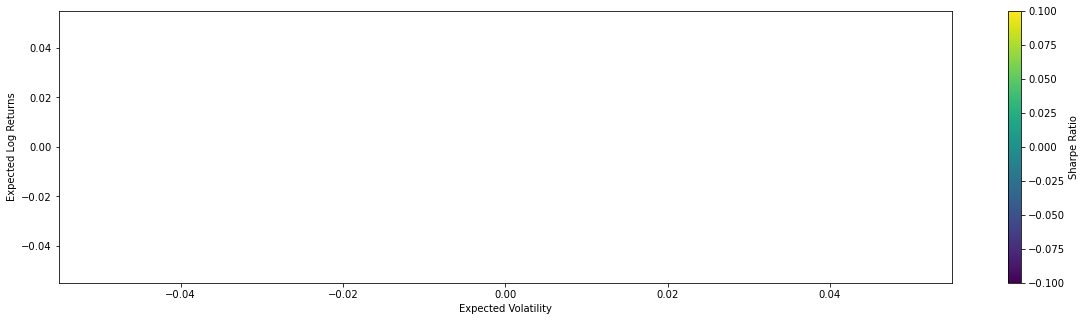

here are the smartfolio weights:          0         1         2         3         4
0  0.171655  0.222682  0.181355  0.212891  0.211417


In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(expected_volatility,expected_return,c=sharpe_ratio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Log Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(expected_volatility[max_index], expected_return[max_index], c='red')
plt.show()
print(f'here are the smartfolio weights:{smartfolio_weights}')

In [23]:
import itertools
from itertools import product
from MCForecastTools import MCSimulation
%matplotlib inline

ModuleNotFoundError: No module named 'MCForecastTools'

In [ ]:
mcsims_df = pd.DataFrame()
for final_cryptos in crypataras_picks:
    mcsims = tv.get_hist(symbol=final_cryptos,
                       exchange=exchange,
                       interval=Interval.in_daily,
                       n_bars=bars)
    mcsims_df = mcsims_df.append(mcsims)

In [ ]:
mcsims_df

In [ ]:
ticker1_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[0]}']
ticker2_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[1]}']
ticker3_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[2]}']
ticker4_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[3]}']
ticker5_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[4]}']
sim_data = pd.concat([ticker1_df, ticker2_df, ticker3_df, ticker4_df, ticker5_df], axis='columns', join='inner')

In [ ]:
mdex = itertools.product(crypataras_picks, ticker1_df.columns)
columns = []
for x in mdex:
 columns.append(x)
sim_data.columns = pd.MultiIndex.from_tuples(columns) 

In [ ]:
smartfolio_weights

In [ ]:
# possible format for mc_weights?
smart_weights =[smartfolio_weights[0],smartfolio_weights[1],smartfolio_weights[2],smartfolio_weights[3],smartfolio_weights[4]]

In [ ]:
MC_even_dist = MCSimulation(
    portfolio_data = sim_data, 
    weights = [.20, .20, .20, .20, .20],
    num_simulation=100,
    num_trading_days = 126
)


In [ ]:
cumula_return = MC_even_dist.calc_cumulative_return()

In [ ]:
cumula_return.to_csv('mc_df.csv')

In [ ]:
type(simulated_returns_data)

In [ ]:
simulated_returns_data = {
    "mean": list(MC_even_dist.simulated_return.mean(axis=1)),
    "median": list(MC_even_dist.simulated_return.median(axis=1)),
    "min": list(MC_even_dist.simulated_return.min(axis=1)),
    "max": list(MC_even_dist.simulated_return.max(axis=1))
}

In [ ]:
df_simulated_returns = pd.DataFrame(simulated_returns_data)

In [ ]:
df_simulated_returns.head()

In [ ]:
df_simulated_returns.to_csv('mc_stats.csv')

In [ ]:
import panel as pn
pn.extension('plotly')
from panel.interact import interact
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from panel import widgets


import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [ ]:
mcs_path = Path("mc_df.csv")
mc_df = pd.read_csv(mcs_path, index_col=[0])
mc_df.index.name="Days"
mc_df.head(30)

In [ ]:
fig1 = px.line(mc_df)
fig1 = fig1.update_layout(
    xaxis_title="Predicted Time Period(Days)",
    yaxis_title="Daily Return",
    showlegend=False,
    title='Simulation of Returns on Portfolio Investment')
fig1.show()

In [ ]:
#use dataframe of stats for daily returns of simulation from aarons part as well
mc_path = Path("mc_stats.csv")
df_simulated_returns = pd.read_csv(mc_path, index_col=[0])
df_simulated_returns.index.name="Days"
df_simulated_returns


In [ ]:

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig2.update_layout(
    height=500,
    width=1200,
    xaxis_title="Number of Days(in Simulation)",
    yaxis_title="Daily Returns",
    legend_title="Stats",
    title="Statistical Analysis for Simulation of Return on Investment")
fig2.show()

In [ ]:
# Set initial investment
initial_investment = 11999

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

In [ ]:
#Plot simulated investment portfolio returns with initial investment number (values are in USD)
fig3 = go.Figure()
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig3 = fig3.update_layout(
    height=500,
    width=1200,
    xaxis_title="Time Period(Days)",
    yaxis_title="Returns(USD)",
    legend_title="Stats",
    title="$11,999 Initial Investment - Predicted Earnings")
fig3.show()

print("You've chosen to invest $11,900 in a diverse cryptocurrency portfolio!")
print("This simulation can help you visualize what your portfolio may look like in the days following your initial investment.")
print("Let's take a look at some other coins that are popularly traded right now.")


In [ ]:
# # # define tickers list
# tickers=['COMPUSD','SUSHIUSD','LTCUSD','ETCUSD','DOGEUSD','STORJUSD','ADAUSD','BTCUSD','ETHUSD','SOLUSD','UNIUSD']

# #set variables
# my_crypto_portfolio = tickers
# df_daily = pd.DataFrame()
# exchange = 'COINBASE',

# #create for loop to append each ticker into dataframe
# for ticker in my_crypto_portfolio:
#     data = tv.get_hist(
#         symbol=ticker,
#         exchange=exchange,
#         interval=Interval.in_daily,n_bars=1000)
#     df_daily = df_daily.append(data)
    
    
# #adjust index from datetime to date to remove timestamp
# df_daily.index = pd.to_datetime(df_daily.index, errors='coerce').date

# #divide volume column by 1,000,000 to remove scientific notation in volume column
# #ONLY RUN THIS ONCE - has compounding affect on volume column
# df_daily['volume'] = (df_daily['volume'].astype(float)/1000).round(4).astype(float)



# df_daily.to_csv('daily_ohlc.csv')

In [ ]:
#DO NOT READ IN THIS DATAFRAME IF YOU GET ^ PREVIOUS CELL TO RUN & FETCH LIVE DATA
#read in COINBASE ticker dataframe
daily_path = Path("daily_ohlc.csv")
df_daily = pd.read_csv(daily_path, index_col=[0])
df_daily.index.name = "Date"

#.loc COINBASE tickers Symbol, Open, High, Low, Close, Volume data as new df
comp_df = df_daily.loc[df_daily.symbol=='COINBASE:COMPUSD']
sushi_df = df_daily.loc[df_daily.symbol=='COINBASE:SUSHIUSD']
ltc_df = df_daily.loc[df_daily.symbol=='COINBASE:LTCUSD']
etc_df = df_daily.loc[df_daily.symbol=='COINBASE:ETCUSD']
doge_df = df_daily.loc[df_daily.symbol=='COINBASE:DOGEUSD']
storj_df = df_daily.loc[df_daily.symbol=='COINBASE:STORJUSD']
ada_df = df_daily.loc[df_daily.symbol=='COINBASE:ADAUSD']
btc_df = df_daily.loc[df_daily.symbol=='COINBASE:BTCUSD']
eth_df = df_daily.loc[df_daily.symbol=='COINBASE:ETHUSD']
sol_df = df_daily.loc[df_daily.symbol=='COINBASE:SOLUSD']
uni_df = df_daily.loc[df_daily.symbol=='COINBASE:UNIUSD']

#reset COINBASE ticker index to prep for plotting candlestick RSI
comp_df=comp_df.tail(60).reset_index()
sushi_df=sushi_df.tail(60).reset_index()
ltc_df=ltc_df.tail(60).reset_index()
etc_df=etc_df.tail(60).reset_index()
doge_df=doge_df.tail(60).reset_index()
storj_df=storj_df.tail(60).reset_index()
ada_df=ada_df.tail(60).reset_index()
btc_df=btc_df.tail(60).reset_index()
eth_df=eth_df.tail(60).reset_index()
sol_df=sol_df.tail(60).reset_index()
uni_df=uni_df.tail(60).reset_index()

In [ ]:

print("When current price falls below the 'lower-bb' we can expect prices to begin to rise - this indicates a good BUY opportunity.") 
print("When current price raises above the 'upper-bb' we can expect prices to begin to fall soon - this presents an opportunity to SELL.")

# calculate sma and std for upper and lower bb for each df in df_list
df_list = [comp_df, sushi_df, ltc_df, etc_df, doge_df, storj_df, ada_df, btc_df, eth_df, sol_df, uni_df]
WINDOW=30

for df in df_list:
    df['sma'] = df['close'].rolling(WINDOW).mean()
    df['std'] = df['close'].rolling(WINDOW).std(ddof = 0)
    
    
    # Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
    fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = (f'{df.symbol[0]} Relative Strength Index', 'Volume(MM)'), vertical_spacing = 0.1, row_width = [.5, 1.4])

# Candlestick Plot
    fig.add_trace(go.Candlestick(x = df['Date'],
                                 open = df['open'],
                                 high = df['high'],
                                 low = df['low'],
                                 close = df['close'], showlegend=False,
                                 increasing_line_color= 'olive', decreasing_line_color= 'darkred',
                                 name = 'candlestick'),
                  row = 1, col = 1)

# Moving Average
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'],
                             line_color = 'black',
                             name = 'sma'),
                  row = 1, col = 1)
    
# Upper Bound
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'] + (df['std'] * 2),
                             line_color = 'tan',
                             line = {'dash': 'dash'},
                             name = 'upper band',
                             opacity = 0.5),
                  row = 1, col = 1) 
# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'] - (df['std'] * 2),
                             line_color = 'tan',
                             line = {'dash': 'dash'},
                             fill = 'tonexty',
                             name = 'lower band',
                             opacity = 0.5),
                  row = 1, col = 1)

# Labels & Titles
    fig.update_layout(
        height=500,
        width=1200,
        xaxis_title=None,
        yaxis_title="Price",
        legend_title="Indicators",
        )
# ----------------

# Volume Plot
    fig.add_trace(go.Bar(x = df['Date'], y = df['volume'], showlegend=False), 
              row = 2, col = 1)
# Remove range slider; (short time frame)
    fig.update(layout_xaxis_rangeslider_visible=True)


    #fig.show();    
   


In [ ]:
comp_df

In [ ]:
#candlestick charts
df_list = [comp_df, sushi_df, ltc_df, etc_df, doge_df, storj_df, ada_df, btc_df, eth_df, sol_df, uni_df]

for df in df_list:
    fig = go.Figure(
    data=[
        go.Candlestick(x=df['Date'],
                       open=df['open'],
                       high=df['high'],
                       low=df['low'],
                       close=df['close'],
                       increasing_line_color= 'olive', decreasing_line_color= 'darkred')
        
    ])
    fig.update(layout_xaxis_rangeslider_visible=True)
    fig.update_layout(
        height=500,
        width=1200,
        title=f'{df.symbol[0]} Daily Price',
        xaxis_title='Date',
        yaxis_title='Daily Price')
    fig.show()


In [ ]:
# dashboard components

# mcsftool plot simulation (120)
fig1 = px.line(mc_df)
fig1 = fig1.update_layout(
    xaxis_title="Predicted Time Period(Days)",
    yaxis_title="Daily Return",
    showlegend=False,
    title='Simulation of Returns on Portfolio Investment')

#stat plot 
fig2 = go.Figure()
fig2 = fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig2 =fig2.update_layout(
    height=500,
    width=1200,
    xaxis_title="Number of Days(in Simulation)",
    yaxis_title="Daily Returns",
    legend_title="Stats",
    title="Statistical Analysis for Simulation of Return on Investment")

#Plot simulated investment portfolio returns with initial investment number (values are in USD)
fig3 = go.Figure()
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig3 =fig3.update_layout(
    height=500,
    width=1200,
    xaxis_title="Time Period(Days)",
    yaxis_title="Returns(USD)",
    legend_title="Stats",
    title="$11,999 Initial Investment - Predicted Earnings")



In [ ]:
monte_column = pn.Column("## Monte Carlo Simulations", fig1)

In [ ]:
return_stats = pn.Column("##Return Stats", fig2)

In [ ]:
investment_sim = pn.Column("## Investment Predictions", fig3)

In [ ]:
simulations = pn.Tabs(
    (
        "Monte Carlo Simulations",
        fig1
    ),
    (
        "Return Stats",
        fig2
    ),
    (
        "Investment Predictions",
        fig3
    )
)
#simulations

In [ ]:
dashboard = pn.Tabs(
    ("Predicted Earnings",monte_column),
    ( "Return Stats",return_stats),
    ("Investment Predictions",fig3)
)

In [ ]:
pn.serve(dashboard)

In [ ]:
#reference v2 for additional updates in visualization section